In [224]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:

def cargar_datos(carpeta="data_raw"):
    list_dataframe = []
    for archivo in os.listdir(carpeta):
        if "pellet" in archivo.lower() and archivo.lower().endswith('.xlsx'):
            ruta_completa = os.path.join(carpeta, archivo)
            try:
                df = pd.read_excel(ruta_completa, skiprows=10)
                cond = df["Fecha Prod."].notnull()
                df = df[cond]
                list_dataframe.append(df)
            except Exception as e:
                print(f"Error leyendo {archivo}: {e}")
    dataframes = pd.concat(list_dataframe)
    return dataframes



In [226]:
dataframes = cargar_datos()

dataframes["Fecha Prod."] = dataframes["Fecha Prod."].replace({"12/01/202": '2024-12-01', "10/02/202": "2024-10-02"})
dataframes["Fecha"] = pd.to_datetime(dataframes["Fecha Prod."], errors="ignore", infer_datetime_format=True).dt.date
dataframes = dataframes[dataframes["Punto"].notnull()]
dataframes["Muestra"] = dataframes["Muestra"].str.strip()
dataframes["Punto"] = dataframes["Punto"].str.strip()
dataframes = dataframes.replace({'N.A': np.nan, 'N': np.nan, 'N.A.': np.nan, "N,A": np.nan, 'N.A.': np.nan})

rename = {
    '% Durab.' : "Porcentaje Durabilidad",
    ' Dureza kg/cm²': "Dureza",
    '10,00': "Granulometría 10",
    '12,00': "Granulometría 12",
    '14,00':  "Granulometría 14", 
    '16,00':  "Granulometría 16",
    'PAN':  "Granulometría Pan",
    'ANALISTA ': "Analista"
}
df_filter = dataframes.rename(columns=rename)

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_62648/3661154488.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_62648/3661154488.py:4: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_62648/3661154488.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [227]:
df_filter.head(2).T

,0,1
Columna1,1.0,2.0
Fecha Prod.,2025-01-04 00:00:00,2025-01-04 00:00:00
Hora Proceso,13:50:00,16:50:00
Muestra,PELLET,PELLET
Punto,ZARANDA 1,ZARANDA 1
Código,200544.0,200544.0
Producto,C.FINALIZADOR VR P.,C.FINALIZADOR VR P.
OP,36.0,36.0
CANT. BACHES A PRODUCIR,25.0,25.0
# BACHE,4.0,7.0


In [228]:
pellets = df_filter[df_filter["Muestra"] == "PELLET"]
pellets["OP"].value_counts(dropna=False)


OP
1.0     24
7.0     12
94.0    11
8.0      9
76.0     8
        ..
55.0     1
79.0     1
78.0     1
75.0     1
62.0     1
Name: count, Length: 100, dtype: int64

In [229]:
pellets[pellets["OP"].isnull()].T

,1636,1637,1627,1628,1641,1642,1632,1633
Columna1,817.0,818.0,817.0,818.0,817.0,818.0,817.0,818.0
Fecha Prod.,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00,2024-10-27 00:00:00
Hora Proceso,18:20:00,18:20:00,18:20:00,18:20:00,18:20:00,18:20:00,18:20:00,18:20:00
Muestra,PELLET,PELLET,PELLET,PELLET,PELLET,PELLET,PELLET,PELLET
Punto,ZARANDA 1,ZARANDA 2,ZARANDA 1,ZARANDA 2,ZARANDA 1,ZARANDA 2,ZARANDA 1,ZARANDA 2
Código,200544.0,200544.0,200544.0,200544.0,200544.0,200544.0,200544.0,200544.0
Producto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANT. BACHES A PRODUCIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# BACHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:

nov = pd.read_excel("data_raw/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2 (2).xlsx", sheet_name="NOVIEMBRE", skiprows=3)
dic = pd.read_excel("data_raw/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2 (3).xlsx", sheet_name="DICIEMBRE ", skiprows=3)
feb = pd.read_excel("data_raw/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2 (1).xlsx", sheet_name="FEBRERO", skiprows=3)
ene = pd.read_excel("data_raw/SIG-FT-411 Control proceso Temperaturas Planta de alimentos balanceados V2.xlsx", sheet_name="ENERO ", skiprows=3)

nov["dif1"] = nov["FECHA TOMA DE MUESTRA"].shift(1)
nov.loc[nov["SITIO TOMA DE MUESTRA"] == "PELLET 1", "FECHA TOMA DE MUESTRA"] = nov["dif1"]

dic["dif1"] = dic["FECHA TOMA DE MUESTRA"].shift(1)
dic.loc[dic["SITIO TOMA DE MUESTRA"] == "PELLET 1", "FECHA TOMA DE MUESTRA"] = dic["dif1"]

ene["dif1"] = ene["FECHA TOMA DE MUESTRA"].shift(1)
ene.loc[ene["SITIO TOMA DE MUESTRA"] == "PELLET 1", "FECHA TOMA DE MUESTRA"] = ene["dif1"]

feb["dif1"] = feb["FECHA TOMA DE MUESTRA"].shift(1)
feb.loc[feb["SITIO TOMA DE MUESTRA"] == "PELLET 1", "FECHA TOMA DE MUESTRA"] = feb["dif1"]



nov["dif1"] = nov["HORA"].shift(1)
nov.loc[nov["SITIO TOMA DE MUESTRA"] == "PELLET 1", "HORA"] = nov["dif1"]

dic["dif1"] = dic["HORA"].shift(1)
dic.loc[dic["SITIO TOMA DE MUESTRA"] == "PELLET 1", "HORA"] = dic["dif1"]

ene["dif1"] = ene["HORA"].shift(1)
ene.loc[ene["SITIO TOMA DE MUESTRA"] == "PELLET 1", "HORA"] = ene["dif1"]

feb["dif1"] = feb["HORA"].shift(1)
feb.loc[feb["SITIO TOMA DE MUESTRA"] == "PELLET 1", "HORA"] = feb["dif1"]

temp = pd.concat([nov, dic, feb, ene])

In [233]:
#temp["dif1"] = temp["FECHA TOMA DE MUESTRA"].shift(1)
#temp.loc[temp["SITIO TOMA DE MUESTRA"] == "PELLET 1", "FECHA TOMA DE MUESTRA"] = nov["dif1"]

cond1 = temp["SITIO TOMA DE MUESTRA"] == "PELLET 1"
cond2 = temp["TERMOMETRO AGROINDUSTRIA"].notnull()

temp_pellet = temp[cond1 & cond2]
temp_pellet

,FECHA TOMA DE MUESTRA,HORA,TURNO,SITIO TOMA DE MUESTRA,TERMOMETRO PLANTA,TERMOMETRO AGROINDUSTRIA,CÓDIGO,FORMULACION,OP,RESPONSABLE,OBSERVACIONES,dif1
1,2024-11-19,16:20:00,NaN,PELLET 1,N.A,93.3,200541.0,LEVANTE VR,1.0,ANGELA AFANADOR,NaN,16:20:00
4,2024-11-20,11:50:00,NaN,PELLET 1,N.A,87.2,200541.0,LEVANTE VR,1.0,ANGELA AFANADOR,NaN,11:50:00
7,2024-11-22,19:00:00,NaN,PELLET 1,N.A,80.9,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,19:00:00
10,2024-11-23,14:24:00,NaN,PELLET 1,N.A,75.3,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,14:24:00
13,2024-11-25,14:00:00,NaN,PELLET 1,N.A,84.5,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19,2025-01-19,09:59:00,NaN,PELLET 1,N.A,84.3,200544.0,FINALIZADOR VR,64.0,ANGELA AFANADOR,NaN,09:59:00
22,2025-01-25,09:47:00,NaN,PELLET 1,N.A,83.1,200544.0,FINALIZADOR VR,75.0,ANGELA AFANADOR,NaN,09:47:00
25,2025-01-28,09:55:00,NaN,PELLET 1,N.A,82.8,200543.0,ENGORDE ESP VR,77.0,ANGELA AFANADOR,NaN,09:55:00
28,2025-01-28,13:16:00,NaN,PELLET 1,N.A,87.6,200543.0,ENGORDE ESP VR,77.0,ANGELA AFANADOR,NaN,13:16:00


In [234]:
temp_pellet.isnull().sum()

FECHA TOMA DE MUESTRA        0
HORA                         0
TURNO                       63
SITIO TOMA DE MUESTRA        0
TERMOMETRO PLANTA            0
TERMOMETRO AGROINDUSTRIA     0
CÓDIGO                       0
FORMULACION                  0
OP                           0
RESPONSABLE                  0
OBSERVACIONES               60
dif1                         0
dtype: int64

In [235]:
temp_pellet["FORMULACION"].value_counts()

FORMULACION
LEVANTE VR           13
FINAL VR             10
FINALIZADOR VR.       6
LEVANTE ESP VR        6
LEVANTE VR            5
FINALIZADOR VR        5
ENGORDE ESP VR        4
C.LEVANTE  VR         3
C.FINALIZACION VR     3
C.LEVANTE ESP VR      2
LEVANTE               2
ENGORDE ESP           2
LEVANTE ESP VR        2
Name: count, dtype: int64

In [236]:
temp_pellet["CÓDIGO"].value_counts()

CÓDIGO
200544.0    22
200541.0    21
200542.0    10
200543.0     4
200119.0     2
200107.0     2
200120.0     2
Name: count, dtype: int64

In [237]:
temp_pellet.groupby(["FORMULACION"]).agg({'CÓDIGO': "unique"})

,CÓDIGO
FORMULACION,
C.FINALIZACION VR,[200544.0]
C.LEVANTE VR,[200541.0]
C.LEVANTE ESP VR,[200542.0]
ENGORDE ESP,[200120.0]
ENGORDE ESP VR,[200543.0]
FINAL VR,"[200544.0, 200119.0]"
FINALIZADOR VR,[200544.0]
FINALIZADOR VR.,[200544.0]
LEVANTE,[200107.0]


In [238]:
temp_pellet["TERMOMETRO AGROINDUSTRIA"].describe()

count    63.000000
mean     82.644762
std       3.437446
min      70.000000
25%      80.600000
50%      83.100000
75%      84.750000
max      93.300000
Name: TERMOMETRO AGROINDUSTRIA, dtype: float64

In [239]:
temp_pellet["OP"].value_counts()

OP
1.0      8
101.0    5
106.0    4
94.0     3
108.0    3
95.0     3
105.0    3
110.0    2
77.0     2
33.0     2
97.0     2
100.0    2
17.0     2
93.0     2
112.0    2
113.0    2
39.0     1
75.0     1
64.0     1
50.0     1
45.0     1
43.0     1
41.0     1
85.0     1
36.0     1
25.0     1
15.0     1
104.0    1
102.0    1
27.0     1
34.0     1
81.0     1
Name: count, dtype: int64

In [240]:
def build_group(group_, agg_, df):
    agg = dict(
    Medio=(agg_, "mean"),
    Mínimo=(agg_, "min"), 
    Quantil25=(agg_, lambda x: x.quantile(0.25)),
    Mediana=(agg_, "median"),
    Quantil75=(agg_, lambda x: x.quantile(0.75)),
    Máximo=(agg_, "max"),
    Cantidad=(agg_, "count"),
    Desviacion_Estandar=(agg_, "std"),  # Dispersión
    Varianza=(agg_, "var"),             # Varianza
    Error_Estandar=(agg_, lambda x: x.std() / (len(x) ** 0.5))  # Error estándar de la media

    )

    df_filter_group = df.groupby(group_, as_index=False).agg(**agg)

    # Iterar sobre las columnas y redondear a dos decimales si son numéricas
    for col in df_filter_group.columns:
        if pd.api.types.is_numeric_dtype(df_filter_group[col]):
            df_filter_group[col] = df_filter_group[col].round(2)
    return df_filter_group

In [241]:
temp_pellet

,FECHA TOMA DE MUESTRA,HORA,TURNO,SITIO TOMA DE MUESTRA,TERMOMETRO PLANTA,TERMOMETRO AGROINDUSTRIA,CÓDIGO,FORMULACION,OP,RESPONSABLE,OBSERVACIONES,dif1
1,2024-11-19,16:20:00,NaN,PELLET 1,N.A,93.3,200541.0,LEVANTE VR,1.0,ANGELA AFANADOR,NaN,16:20:00
4,2024-11-20,11:50:00,NaN,PELLET 1,N.A,87.2,200541.0,LEVANTE VR,1.0,ANGELA AFANADOR,NaN,11:50:00
7,2024-11-22,19:00:00,NaN,PELLET 1,N.A,80.9,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,19:00:00
10,2024-11-23,14:24:00,NaN,PELLET 1,N.A,75.3,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,14:24:00
13,2024-11-25,14:00:00,NaN,PELLET 1,N.A,84.5,200544.0,FINALIZADOR VR.,1.0,ANGELA AFANADOR,NaN,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19,2025-01-19,09:59:00,NaN,PELLET 1,N.A,84.3,200544.0,FINALIZADOR VR,64.0,ANGELA AFANADOR,NaN,09:59:00
22,2025-01-25,09:47:00,NaN,PELLET 1,N.A,83.1,200544.0,FINALIZADOR VR,75.0,ANGELA AFANADOR,NaN,09:47:00
25,2025-01-28,09:55:00,NaN,PELLET 1,N.A,82.8,200543.0,ENGORDE ESP VR,77.0,ANGELA AFANADOR,NaN,09:55:00
28,2025-01-28,13:16:00,NaN,PELLET 1,N.A,87.6,200543.0,ENGORDE ESP VR,77.0,ANGELA AFANADOR,NaN,13:16:00


In [242]:
build_group(group_=["CÓDIGO"], agg_="TERMOMETRO AGROINDUSTRIA", df=temp_pellet).sort_values('CÓDIGO')

,CÓDIGO,Medio,Mínimo,Quantil25,Mediana,Quantil75,Máximo,Cantidad,Desviacion_Estandar,Varianza,Error_Estandar
0,200107.0,80.95,80.7,80.82,80.95,81.08,81.2,2,0.35,0.12,0.25
1,200119.0,79.75,79.1,79.42,79.75,80.08,80.4,2,0.92,0.85,0.65
2,200120.0,85.80,85.8,85.80,85.80,85.80,85.8,2,0.00,0.00,0.00
3,200541.0,83.95,76.4,82.10,83.50,85.20,93.3,21,3.52,12.41,0.77
4,200542.0,83.07,79.3,82.00,83.90,84.12,86.0,10,1.94,3.78,0.62
5,200543.0,83.28,77.7,81.53,83.90,85.65,87.6,4,4.20,17.66,2.10
6,200544.0,81.22,70.0,80.40,81.75,83.38,86.2,22,3.59,12.88,0.77


In [243]:
temp_pellet[temp_pellet["CÓDIGO"] == 200541.0]["FORMULACION"].value_counts()

FORMULACION
LEVANTE VR       13
LEVANTE VR        5
C.LEVANTE  VR     3
Name: count, dtype: int64

In [244]:
temp_pellet[temp_pellet["CÓDIGO"] == 200541.0]["FORMULACION"].unique()

array(['LEVANTE VR', 'C.LEVANTE  VR', 'LEVANTE VR '], dtype=object)

In [251]:
recat = {
'FINALIZADOR VR.': 'FINALIZADOR VR', 
'C.FINALIZACION VR': 'FINALIZADOR VR',
'FINAL VR ': 'FINALIZADOR VR',
'FINALIZADOR VR' : 'FINALIZADOR VR',
'C.LEVANTE ESP VR':  'LEVANTE ESP VR' ,
'LEVANTE ESP VR ':  'LEVANTE ESP VR' ,
'LEVANTE ESP VR' : 'LEVANTE ESP VR',
'LEVANTE VR': 'LEVANTE VR', 
'C.LEVANTE  VR': 'LEVANTE VR', 
'LEVANTE VR ': 'LEVANTE VR'
}

temp_pellet["FORMULACION"] = temp_pellet["FORMULACION"].apply(lambda x : recat.get(x, x))
estadisticos_temp = build_group(group_=["FORMULACION", "CÓDIGO"], agg_="TERMOMETRO AGROINDUSTRIA", df=temp_pellet)
estadisticos_temp.to_csv("../data/estadisticos_temp.csv", index=False)

/var/folders/1g/77kw2x4j5678s_87_sqc1fpc0000gp/T/ipykernel_62648/1393893513.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [265]:
cod_name = temp_pellet[["FORMULACION", "CÓDIGO"]]
cod_name = cod_name.drop_duplicates()

In [267]:
cod_name = cod_name.rename(columns={"CÓDIGO": "Código"})
cod_name.to_csv("cod_name.csv", index=False)

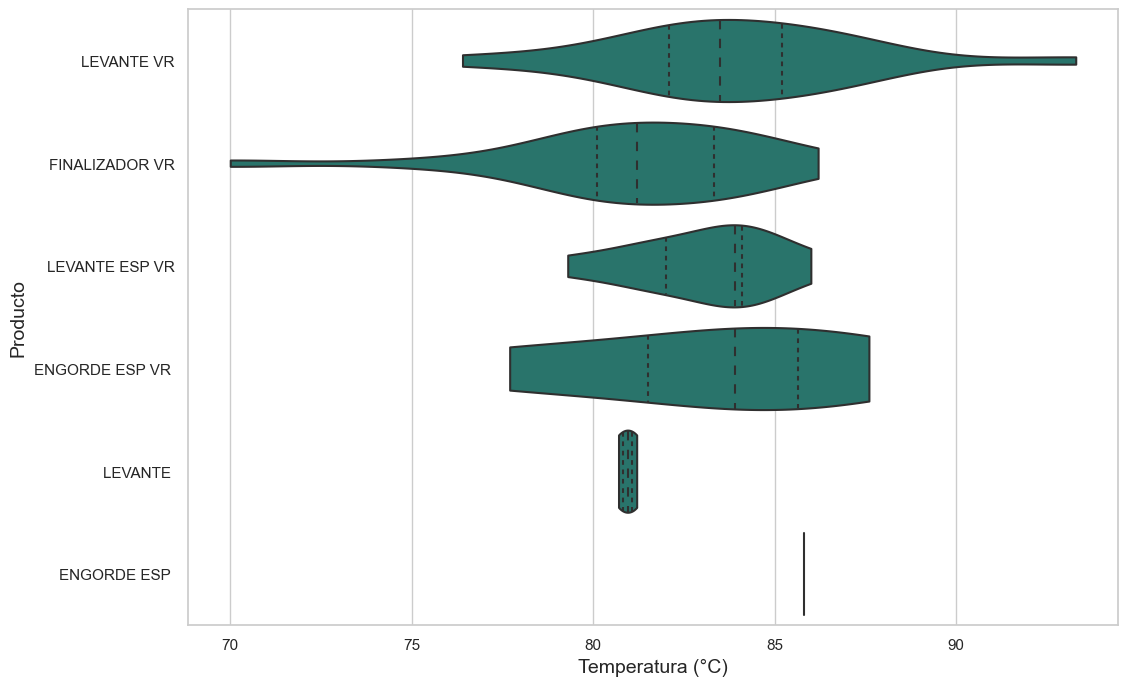

In [263]:


# Diagrama de Violín con Seaborn
plt.figure(figsize=(12, 8))
#sns.violinplot(data=temp_pellet, x="TERMOMETRO AGROINDUSTRIA", y="CÓDIGO", split=True, color="#1c8074", inner="quart")

sns.violinplot(
    data=temp_pellet,
    y="FORMULACION",
    x="TERMOMETRO AGROINDUSTRIA",
    split=True,
    inner="quart",   # Muestra cuartiles dentro del violín
    scale="width",   # Ajusta el ancho según la cantidad de datos
    cut=0,           # Muestra solo la parte superior del violín
    color="#1c8074"
)

# Configuración del gráfico
#plt.title("Distribución de TERMOMETRO AGROINDUSTRIA por CÓDIGO", fontsize=16)
plt.xlabel("Temperatura (°C)", fontsize=14)
plt.ylabel("Producto", fontsize=14)
plt.show()




In [125]:
temp_pellet[temp_pellet["OP"] == 106.0]

,FECHA TOMA DE MUESTRA,HORA,TURNO,SITIO TOMA DE MUESTRA,TERMOMETRO PLANTA,TERMOMETRO AGROINDUSTRIA,CÓDIGO,FORMULACION,OP,RESPONSABLE,OBSERVACIONES,dif1,dif2
70,2025-02-13,01:21:00,NaN,PELLET 1,N.A,83.1,200541.0,LEVANTE VR,106.0,LUZ ANGELA TOCORA,NaN,01:21:00,NaT
73,2025-02-13,15:53:00,NaN,PELLET 1,N.A,85.2,200541.0,LEVANTE VR,106.0,LUZ ANGELA TOCORA,NaN,15:53:00,NaT
76,2025-02-13,18:54:00,NaN,PELLET 1,N.A,85.1,200541.0,LEVANTE VR,106.0,ANGELA AFANADOR,NaN,18:54:00,NaT
79,2025-02-13,23:17:00,NaN,PELLET 1,N.A,82.1,200541.0,LEVANTE VR,106.0,ANGELA AFANADOR,NaN,23:17:00,NaT


In [126]:
pellets[pellets["OP"] == 106].T

,155,156,157,158,162
Columna1,152.0,153.0,155.0,156.0,160.0
Fecha Prod.,2025-02-13 00:00:00,2025-02-13 00:00:00,2025-02-13 00:00:00,2025-02-13 00:00:00,2025-02-13 00:00:00
Hora Proceso,13:00:00,19:07:00,13:40:00,15:50:00,21:13:00
Muestra,PELLET,PELLET,PELLET,PELLET,PELLET
Punto,ZARANDA 1,ZARANDA 1,ZARANDA 1,ZARANDA 1,ZARANDA 1
Código,200541.0,200541.0,200541.0,200541.0,200541.0
Producto,C. LEVANTE VR P.,C. LEVANTE VR P.,C. LEVANTE VR P.,C. LEVANTE VR P.,C. LEVANTE VR P.
OP,106.0,106.0,106.0,106.0,106.0
CANT. BACHES A PRODUCIR,45.0,45.0,45.0,45.0,45.0
# BACHE,4.0,29.0,7.0,15.0,39.0


In [154]:
## Tengamos una temperatura por OP, para tener una llave unica
temp_group = temp_pellet.groupby(["OP", "CÓDIGO"], as_index=False).agg(temperatura=("TERMOMETRO AGROINDUSTRIA", "median"))

In [157]:
temp_group["OP"].duplicated().sum()

2

In [158]:
temp_group[temp_group.duplicated("OP", keep=False)]

,OP,CÓDIGO,temperatura
0,1.0,200541.0,90.25
1,1.0,200544.0,82.80
19,93.0,200542.0,81.10
20,93.0,200543.0,77.70


In [159]:
temp_group = temp_group.drop_duplicates('OP', keep="last")

In [160]:
temp_group

,OP,CÓDIGO,temperatura
1,1.0,200544.0,82.80
2,15.0,200542.0,86.00
3,17.0,200541.0,87.05
4,25.0,200541.0,80.50
5,27.0,200542.0,84.12
6,33.0,200544.0,82.15
7,34.0,200544.0,80.40
8,36.0,200544.0,85.20
9,39.0,200541.0,85.10
10,41.0,200542.0,84.10


In [163]:
pellets["Muestra"].value_counts()

Muestra
PELLET    384
Name: count, dtype: int64

In [166]:
pellets["Punto"].value_counts()

Punto
ZARANDA 1      307
POS-ENGRASE     69
TOLVA            4
ZARANDA 2        4
Name: count, dtype: int64

In [171]:
op_punto = pellets.groupby("OP", as_index=False).agg({"Punto": "unique"})
op_punto["diff_puntos"] = op_punto["Punto"].apply(len)
op_punto


,OP,Punto,diff_puntos
0,1.0,"[ZARANDA 1, POS-ENGRASE]",2
1,3.0,[POS-ENGRASE],1
2,4.0,[POS-ENGRASE],1
3,5.0,"[POS-ENGRASE, ZARANDA 1]",2
4,6.0,[POS-ENGRASE],1
...,...,...,...
94,106.0,[ZARANDA 1],1
95,107.0,"[TOLVA, ZARANDA 1]",2
96,108.0,[ZARANDA 1],1
97,109.0,[ZARANDA 1],1


In [172]:
op_punto[op_punto["diff_puntos"]>1]

,OP,Punto,diff_puntos
0,1.0,"[ZARANDA 1, POS-ENGRASE]",2
3,5.0,"[POS-ENGRASE, ZARANDA 1]",2
9,11.0,"[POS-ENGRASE, TOLVA]",2
21,25.0,"[TOLVA, POS-ENGRASE]",2
22,26.0,"[ZARANDA 1, POS-ENGRASE]",2
64,76.0,"[ZARANDA 1, TOLVA]",2
95,107.0,"[TOLVA, ZARANDA 1]",2


In [173]:
op_punto[op_punto["diff_puntos"]==1]

,OP,Punto,diff_puntos
1,3.0,[POS-ENGRASE],1
2,4.0,[POS-ENGRASE],1
4,6.0,[POS-ENGRASE],1
5,7.0,[POS-ENGRASE],1
6,8.0,[POS-ENGRASE],1
...,...,...,...
93,105.0,[ZARANDA 1],1
94,106.0,[ZARANDA 1],1
96,108.0,[ZARANDA 1],1
97,109.0,[ZARANDA 1],1


In [174]:
pellets.shape

(384, 27)

In [175]:
pellets = pd.merge(pellets, temp_group, on='OP', how='left')

In [209]:
pellets.groupby(["Punto"]).agg({"temperatura": ["mean", "median",  "count"]})

temperatura             
                   mean median count
Punto                               
POS-ENGRASE   82.664706   82.8    17
TOLVA         80.500000   80.5     1
ZARANDA 1     83.010317   83.1   126
ZARANDA 2           NaN    NaN     0

In [207]:
temp_pellet["TERMOMETRO AGROINDUSTRIA"].mean()

82.64476190476194

In [186]:
cod_inc = pellets[pellets["CÓDIGO"] != pellets["Código"]][["OP", "CÓDIGO", "Código", "Fecha"]]

In [ ]:
date_bad = cod_inc.groupby(["Fecha"], as_index=False).agg(count =("Fecha", "count"))


<Axes: xlabel='Fecha', ylabel='count'>

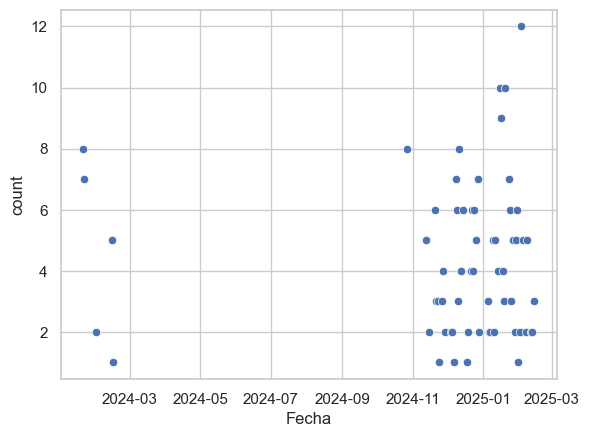

In [196]:
sns.scatterplot(data=date_bad, x="Fecha", y="count")

In [199]:
date_bad["Fecha"].max()

datetime.date(2025, 2, 14)